In [1]:
%matplotlib inline

In [2]:
import numpy as np
from fuel.datasets.hdf5 import H5PYDataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [229]:
BATH_SIZE = 100
IMG_SIZE = 256

# Img resizing stuff
LR_HR_RATIO = 4
BIG_SIZE = int(IMG_SIZE * 76 / 64)
SMALL_SIZE = int(BIG_SIZE / LR_HR_RATIO)

DATA_TEMPLATE = '/data/fashion/extract_sample_3_%i_%i.h5'
LANGUAGE_MODEL_VOCABULARY = '/data/text-embedding/vocab-2016-09-10.txt'

FASTTEXT_DATA = '/data/fashion/txt/fashion.txt'
FASTTEXT_DATA_TRAIN = '/data/fashion/txt/fashion-train.txt'
FASTTEXT_DATA_CLEAN = '/data/fashion/txt/fashion-clean.txt'

In [100]:
import json
categories = json.load(open('/data/fashion/categories.json', 'rt'))
id2category = { v: str(k) for k, v in categories.iteritems() }

In [4]:
data_set = H5PYDataset(DATA_TEMPLATE % (IMG_SIZE, IMG_SIZE), which_sets=('all',))

In [5]:
print("There are %i examples" % data_set.num_examples)

There are 186759 examples


In [155]:
import string
from collections import Counter

BLACK_LIST = string.punctuation.replace('%', '') + '\n'

def normalize(text_array, black_list = BLACK_LIST, vocab=None, lowercase =  True, tokenize = False):
    text = text_array[0][0]
    if black_list:
        text = text.translate(None, BLACK_LIST)
    if lowercase:
        text = text.lower()
    if vocab:
        text = ' '.join([word for word in text.split() if word in vocab])
    if tokenize:
        return text.split()
    return text

def encode_fast_text(label, text):
    clean_label = label.lower().replace(" ", "-")
    clean_text = ' '.join(text[0][0].split())
    return "__label__%s %s\n" % (clean_label, clean_text)

In [161]:
data_set.num_examples

186759

In [158]:
def dump_to_fastext_corpora(data_set, output, id2category,
                            batch_size = BATH_SIZE, 
                            limit=None):
    '''
    Dumps the dataset to be consumed by fastT ext.
    '''
    N = data_set.num_examples
    num_batch = N / batch_size
    
    handle = data_set.open()
    with open(output, 'wr') as f:
        processed = 0
        for i in itertools.islice(xrange(num_batch), limit):
            # fetch batch of data
            text_batch, img_batch, metadata_batch  = data_set.get_data(
                handle, slice(i*batch_size, min((i+1)*batch_size, N - processed)))
            
            # process batch
            lines = [encode_fast_text(id2category[id_], text) for 
                     text, id_ in zip(text_batch, metadata_batch[:,0])]

            # dumplines
            f.writelines(lines)
            
            # track progress 
            processed += text_batch.shape[0]   
            if i % 100 == 0:
                percent = int(((100.0 * i )/ num_batch))
                print("Processing %i batch out of %i [%i processed]" % (i +1, num_batch +1, processed))

In [159]:
dump_to_fastext_corpora(data_set, FASTTEXT_CORPORA, id2category)

Processing 1 batch out of 1868 [100 processed]
Processing 101 batch out of 1868 [10100 processed]
Processing 201 batch out of 1868 [20100 processed]
Processing 301 batch out of 1868 [30100 processed]
Processing 401 batch out of 1868 [40100 processed]
Processing 501 batch out of 1868 [50100 processed]
Processing 601 batch out of 1868 [60100 processed]
Processing 701 batch out of 1868 [70100 processed]
Processing 801 batch out of 1868 [80100 processed]
Processing 901 batch out of 1868 [90100 processed]
Processing 1001 batch out of 1868 [100100 processed]
Processing 1101 batch out of 1868 [110100 processed]
Processing 1201 batch out of 1868 [120100 processed]
Processing 1301 batch out of 1868 [130100 processed]
Processing 1401 batch out of 1868 [140100 processed]
Processing 1501 batch out of 1868 [150100 processed]
Processing 1601 batch out of 1868 [160100 processed]
Processing 1701 batch out of 1868 [170100 processed]
Processing 1801 batch out of 1868 [180100 processed]


In [79]:
import itertools
import math

c = Counter()
handle = data_set.open()
num_batch = data_set.num_examples / BATH_SIZE
for i in xrange(num_batch):
    if i % 100 == 0:
        percent = int(((100.0 * i )/ num_batch))
        print("Processing %i batch out of %i [%i percent]" % (i, num_batch, percent))
        print("Number of tokens in the dictionary: %i" % len(c))
    text_batch, img_batch, metadata_batch  = \
    data_set.get_data(
        handle, 
        slice(i*BATH_SIZE, min((i+1)*BATH_SIZE, data_set.num_examples))
    )
    
    tokens = itertools.chain(*[normalize(text, tokenize=True) for text in text_batch])
    c.update(tokens)

Processing 0 batch out of 1867 [0 percent]
Number of tokens in the dictionary: 0
Processing 100 batch out of 1867 [5 percent]
Number of tokens in the dictionary: 2341
Processing 200 batch out of 1867 [10 percent]
Number of tokens in the dictionary: 3015
Processing 300 batch out of 1867 [16 percent]
Number of tokens in the dictionary: 3702
Processing 400 batch out of 1867 [21 percent]
Number of tokens in the dictionary: 4287
Processing 500 batch out of 1867 [26 percent]
Number of tokens in the dictionary: 4685
Processing 600 batch out of 1867 [32 percent]
Number of tokens in the dictionary: 5033
Processing 700 batch out of 1867 [37 percent]
Number of tokens in the dictionary: 5576
Processing 800 batch out of 1867 [42 percent]
Number of tokens in the dictionary: 6033
Processing 900 batch out of 1867 [48 percent]
Number of tokens in the dictionary: 6416
Processing 1000 batch out of 1867 [53 percent]
Number of tokens in the dictionary: 6729
Processing 1100 batch out of 1867 [58 percent]
Nu

In [81]:
c.most_common(10)

[('in', 445178),
 ('at', 372687),
 ('tonal', 219210),
 ('and', 158269),
 ('leather', 148084),
 ('black', 137481),
 ('collar', 92321),
 ('logo', 91630),
 ('stitching', 84560),
 ('sole', 78603)]

('Turtlenecks', 'long sleeve rib knit woolblend pullover in black turtleneck collar tonal stitching 60% wool 40% nylon made in italy')


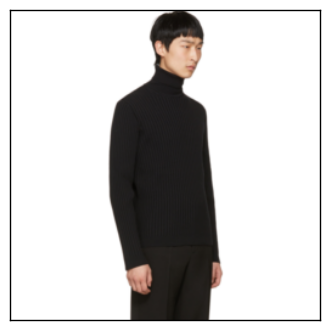

('Sweatshirts', 'long sleeve french terry sweatshirt in black rib knit crewneck collar cuffs and hem logo printed in white at front tonal stitching 100% cotton imported')


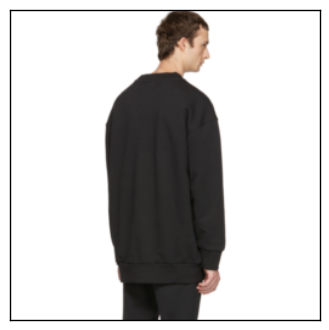

('Sweatshirts', 'long sleeve french terry sweatshirt in black rib knit crewneck collar cuffs and hem logo printed in white at front tonal stitching 100% cotton imported')


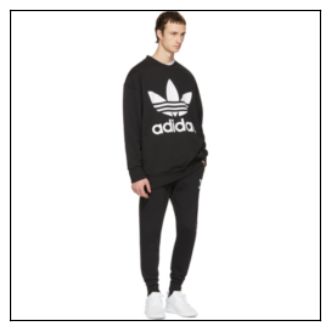

('Sweatshirts', 'long sleeve french terry sweatshirt in black rib knit crewneck collar cuffs and hem logo printed in white at front tonal stitching 100% cotton imported')


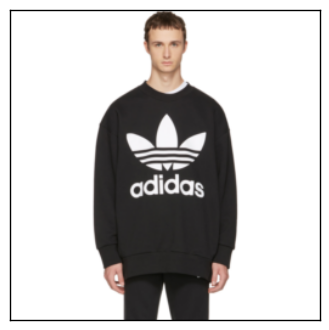

In [86]:
limit = 4
for text, id_, img in zip(text_batch[:limit], metadata_batch[:,0][:limit], img_batch[:limit]):
    print(id2category[id_], ' '.join(normalize(text, tokenize=True)))
    clean_plot(img)

# Are we missing something?

In [87]:
with open(LANGUAGE_MODEL_VOCABULARY, 'rt') as f:
    vocab = set(f.read().split('\n'))

In [88]:
missing_words = Counter({ word: c[word] for word in c if word.lower() not in vocab})
print("There are %i missing words out of %i" % (len(missing_words), len(c)))
print("Most common mising words")
missing_words.most_common(10)

There are 3821 missing words out of 8321
Most common mising words


[('100%', 53581),
 ('silvertone', 35115),
 ('goldtone', 30340),
 ('stitching100%', 28808),
 ('laceup', 22392),
 ('cottonmade', 19096),
 ('stitchingupper', 18208),
 ('pressstud', 14701),
 ('stitchingbody', 14580),
 ('rubbermade', 13898)]

In [89]:
# load sample data
import random
i = random.randint(0, data_set.num_examples)

In [90]:
text, img, metadata  = data_set.get_data(handle, slice(i, (i+1)))

text = text[0]
# to change from (BATCH_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS ) to an actual image
img = img.reshape(IMG_SIZE, IMG_SIZE, 3)
category = int(metadata[0][0])

In [93]:
def clean_plot(img):
    plt.imshow(img); plt.xticks([]); plt.yticks([]); plt.show()

Raw text: 
Relaxed-fit panelled French terry lounge pants in 'darkest' black. Concealed drawstring at elasticized waistband. Two-pocket styling. Text embroidered in white at legs. Mock-fly. Tonal stitching. 100% cotton. Imported.

Normalized text: 
relaxedfit panelled french terry lounge pants in darkest black concealed drawstring at elasticized waistband twopocket styling text embroidered in white at legs mockfly tonal stitching 100% cotton imported

Normalized text with vocab: 
relaxedfit panelled french terry lounge pants in darkest black concealed drawstring at elasticized waistband twopocket styling text embroidered in white at legs mockfly tonal stitching 100% cotton imported



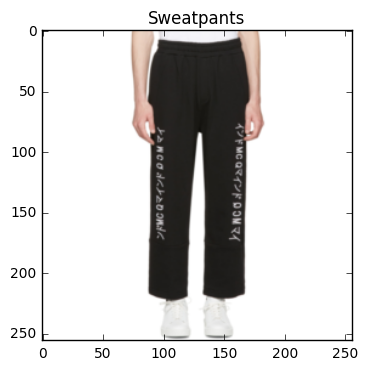

In [109]:
plt.title(id2category[category])
plt.imshow(img);
print("Raw text: \n%s\n" % ' '.join(text[0][0].split()))
print("Normalized text: \n%s\n" %  ' '.join(normalize(text, tokenize=True)))
print("Normalized text with vocab: \n%s\n" %  ' '.join(normalize(text, vocab, tokenize=True)))
plt.show()

## To be consistent with StackGAN

In [101]:
import scipy.misc

In [102]:
def clean_plot_dpi(img, size, dpi=60):
    plt.figure().set_size_inches(float(size)/float(dpi),float(size)/float(dpi))
    plt.xticks([]); plt.yticks([]);
    plt.imshow(img);

In [103]:
img_304 = scipy.misc.imresize(img, [BIG_SIZE, BIG_SIZE], 'bicubic')
img_76 = scipy.misc.imresize(img, [SMALL_SIZE, SMALL_SIZE], 'bicubic')

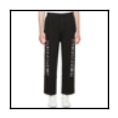

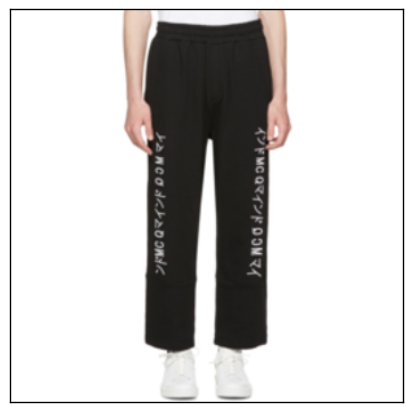

In [104]:
clean_plot(img_76, SMALL_SIZE) ; clean_plot(img_304, BIG_SIZE);

# Text preprocessing for fastText

In [237]:
from random import sample

def clean_line(text):
    return text.translate(None, BLACK_LIST).lower()

def process(line):
    label, text = line.split(" ", 1)
    return "%s %s\n" % (label, clean_line(line))

def strip(line):
    _, text = line.split(" ", 1)
    return "%s\n" % clean_line(text)

with open(FASTTEXT_DATA, 'rt') as f:
    all_lines = f.readlines()
    lines = list(set(all_lines))

with open(FASTTEXT_DATA_TRAIN, 'wt') as f:
    f.writelines(sample([process(line) for line in lines], len(lines)))
    
with open(FASTTEXT_DATA_CLEAN, 'wt') as f:
    f.writelines([strip(line) for line in all_lines])

In [1]:
from tensorflow.python.client import device_lib

In [2]:
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15711378243169105013
, name: "/gpu:0"
device_type: "GPU"
memory_limit: 11982592410
locality {
  bus_id: 1
}
incarnation: 12150502580530950777
physical_device_desc: "device: 0, name: TITAN Xp, pci bus id: 0000:0c:00.0"
, name: "/gpu:1"
device_type: "GPU"
memory_limit: 11982592410
locality {
  bus_id: 1
}
incarnation: 8819015065664435581
physical_device_desc: "device: 1, name: TITAN Xp, pci bus id: 0000:0d:00.0"
]
